In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/credit-card-fraud-detection/creditcard.csv


In [157]:
import pandas as pd
import numpy as np

In [158]:
data=pd.read_csv('/kaggle/input/credit-card-fraud-detection/creditcard.csv')

In [159]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [160]:
corrmat=data.corr()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


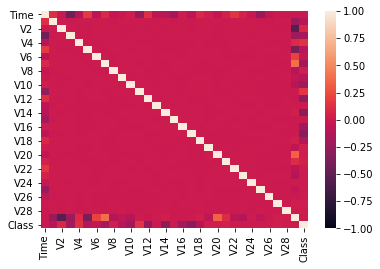

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corrmat,vmin=-1,vmax=1)
corrmat

In [162]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [164]:
fornot=data.groupby('Class').size()

In [165]:
fornot[0]

284315

In [166]:
notafraud=fornot[0]/fornot.sum()

In [167]:
notafraud*100

99.82725143693798

Text(0.5, 1.0, 'Distribution of Time Variable')

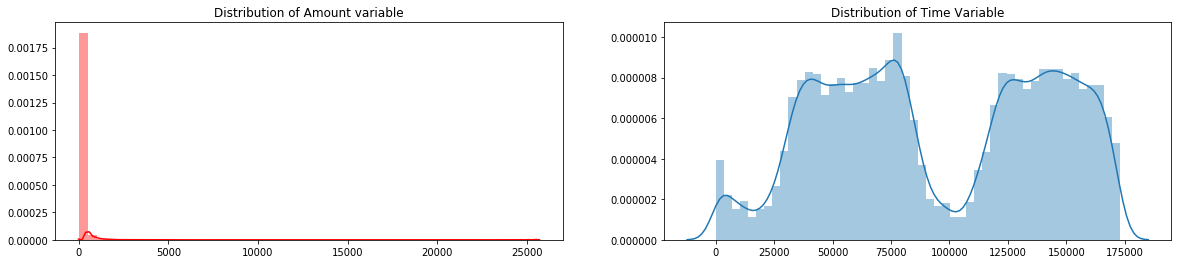

In [168]:
fig,ax=plt.subplots(1,2,figsize=(20,4))
amount_val=data['Amount'].values
time_val=data['Time'].values
sns.distplot(amount_val,ax=ax[0],color='Red')
ax[0].set_title('Distribution of Amount variable')
sns.distplot(time_val,ax=ax[1])
ax[1].set_title('Distribution of Time Variable')

Scaling and Distributing

In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
What is a sub-Sample?
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [169]:
from sklearn.preprocessing import RobustScaler

In [170]:
ro_scaler=RobustScaler()

In [171]:
data['Time']=ro_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [172]:
data['Amount']=ro_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [173]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [174]:
from sklearn.model_selection import train_test_split,StratifiedKFold


In [175]:
X=data.drop('Class',axis=1)
Y=data['Class']

In [176]:
sss=StratifiedKFold(n_splits=5,random_state=None,shuffle=True)

In [177]:
for train_index, test_index in sss.split(X, Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     13     14 ... 284789 284797 284803]
Train: [     0      2      4 ... 284803 284804 284805] Test: [     1      3      7 ... 284801 284802 284806]
Train: [     0      1      2 ... 284803 284804 284806] Test: [    17     18     19 ... 284799 284800 284805]
Train: [     0      1      2 ... 284803 284805 284806] Test: [     5     24     32 ... 284783 284798 284804]
Train: [     1      3      5 ... 284804 284805 284806] Test: [     0      2      4 ... 284786 284787 284788]


Random Under-Sampling:


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction).

In [178]:
#before performing under sampling we will shuffle the data
data=data.sample(frac=1)
fraud_data=data.loc[data['Class']==1]
nonfraud_data=data.loc[data['Class']==0][:492]
normal_distributed_data=pd.concat([fraud_data,nonfraud_data])
new_data=normal_distributed_data.sample(frac=1,random_state=42)

In [179]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262311,0.889566,-1.295027,0.527305,-0.221929,-0.122081,1.887848,-0.932252,1.742760,-0.448194,-0.827327,...,0.022819,0.429764,0.292795,0.601477,0.422247,-0.743053,0.053630,0.045260,0.377279,0
252774,0.837334,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,-0.296653,1
264871,0.903934,-2.707969,-2.681048,1.616168,-0.705674,3.171417,-1.981312,-1.633829,0.450659,0.635774,...,0.540386,0.736696,0.202431,-0.484285,0.199849,-0.412862,0.029394,0.196356,-0.167819,0
64460,-0.394001,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,1.089779,1
154693,0.210611,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,...,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,-0.293440,1


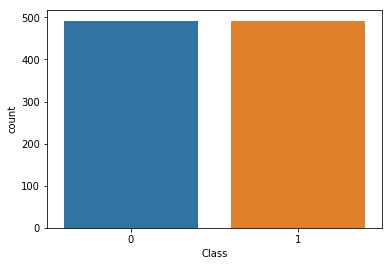

In [180]:
sns.countplot('Class',data=new_data)

We can see out target variable is now equally and normally distributed.

Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

Summary and Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.
Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

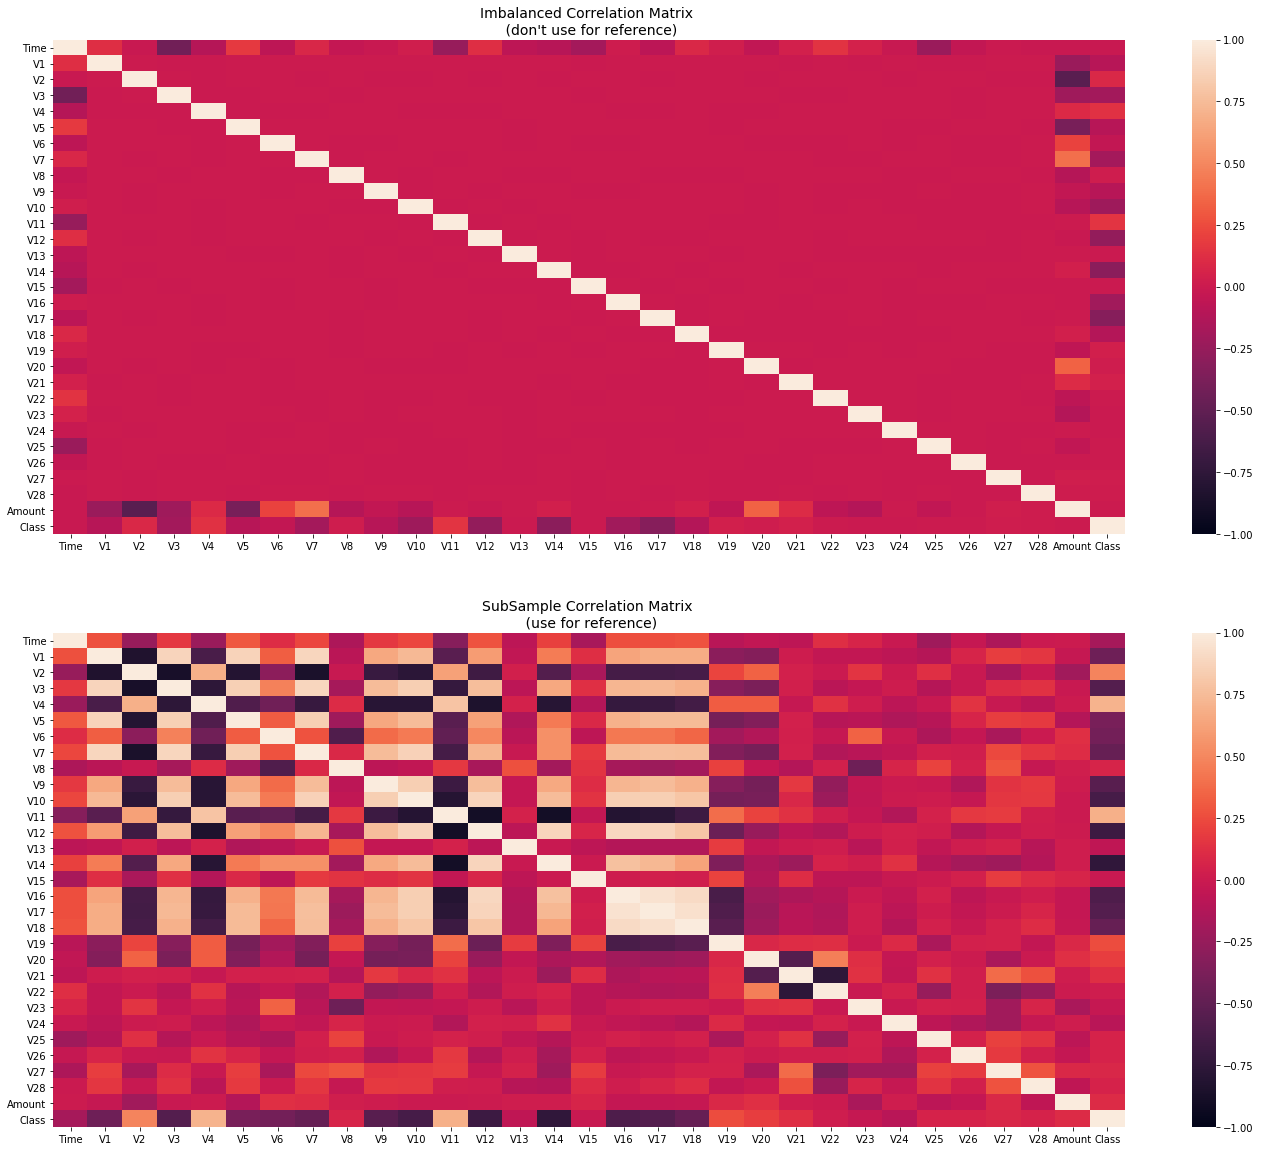

In [181]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(24,20))

corrmat1=data.corr()
sns.heatmap(corrmat1,vmin=-1,vmax=1,ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

corrmat2=new_data.corr()
sns.heatmap(corrmat2,vmin=-1,vmax=1,ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

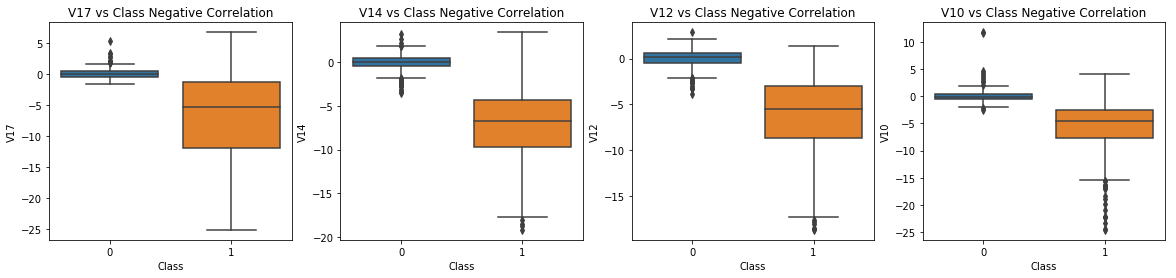

In [182]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_data,  ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_data,  ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_data, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_data, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

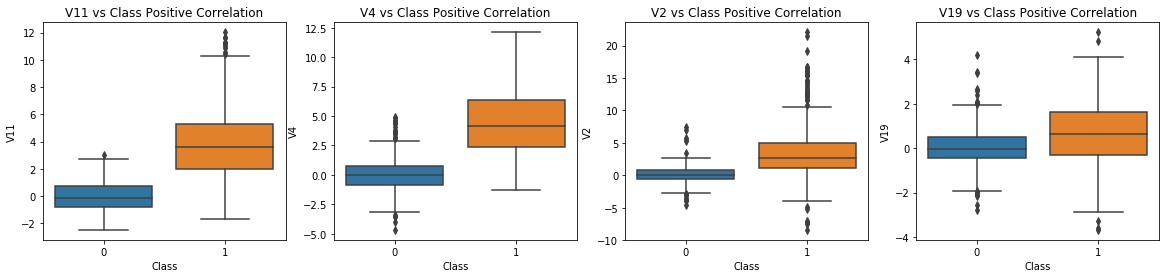

In [183]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_data, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_data, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Summary:

Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

Note: After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

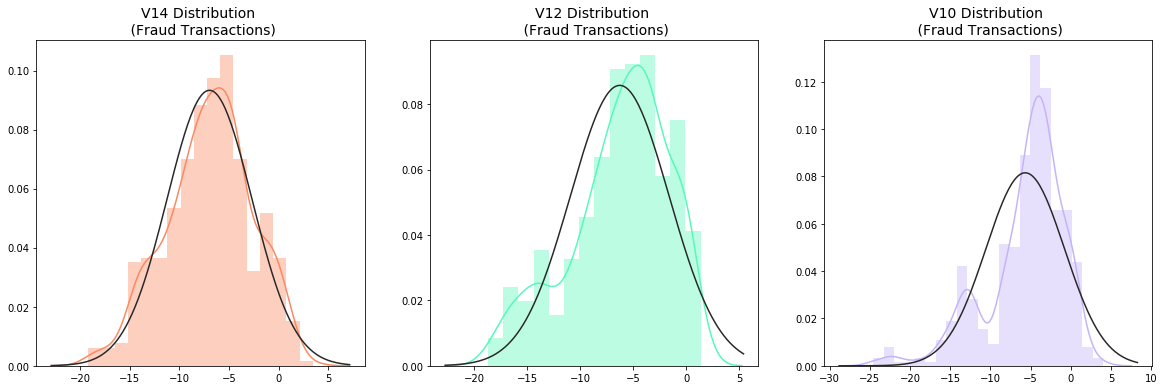

In [184]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_data['V14'].loc[new_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_data['V12'].loc[new_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_data['V10'].loc[new_data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [185]:
v14_fraud=new_data['V14'].loc[new_data['Class']==1].values
q25,q75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
v14_iqr=q75-q25
v14_cutoff=v14_iqr*1.5
v14_lower,v14_upper=q25-v14_cutoff,q75+v14_cutoff
outliers=[x for x in v14_fraud if x<v14_lower or x>v14_upper]
new_data=new_data.drop(new_data[(new_data['V14']>v14_upper) | (new_data['V14']<v14_lower)].index)

In [186]:
v12_fraud=new_data['V12'].loc[new_data['Class']==1].values
q25,q75=np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v12_iqr=q75-q25
v12_cutoff=v12_iqr*1.5
v12_lower,v12_upper=q25-v12_cutoff,q75+v12_cutoff
outliers=[x for x in v12_fraud if x<v12_lower or x>v12_upper]
new_data=new_data.drop(new_data[(new_data['V12']>v12_upper) | (new_data['V12']<v12_lower)].index)

In [187]:
v10_fraud=new_data['V10'].loc[new_data['Class']==1].values
q25,q75=np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
v10_iqr=q75-q25
v10_cutoff=v10_iqr*1.5
v10_lower,v10_upper=q25-v10_cutoff,q75+v10_cutoff
outliers=[x for x in v10_fraud if x<v10_lower or x>v10_upper]
new_data=new_data.drop(new_data[(new_data['V10']>v10_upper) | (new_data['V10']<v10_lower)].index)

In [188]:
v17_fraud=new_data['V17'].loc[new_data['Class']==1].values
q25,q75=np.percentile(v17_fraud,25),np.percentile(v17_fraud,75)
v17_iqr=q75-q25
v17_cutoff=v17_iqr*1.5
v17_lower,v17_upper=q25-v17_cutoff,q75+v17_cutoff
new_data=new_data.drop(new_data[(new_data['V17']>v17_upper) | (new_data['V17']<v17_lower)].index)

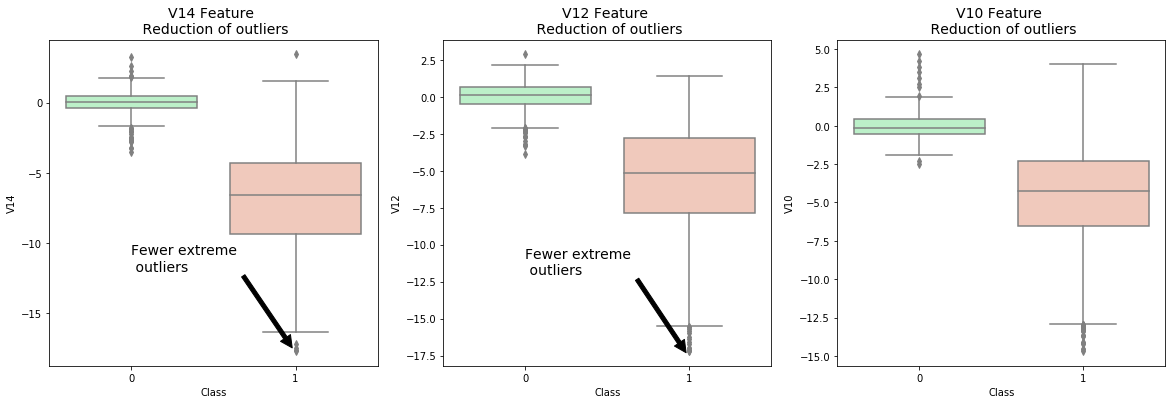

In [189]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_data,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_data, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_data, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()



In [190]:
cols=['V2', 'V4', 'V11', 'V19' ]
for col in cols:
    col_fraud=new_data[col].loc[new_data['Class']==1].values
    q25,q75=np.percentile(col_fraud,25),np.percentile(col_fraud,75)
    col_iqr=q75-q25
    col_cutoff=col_iqr*1.5
    col_lower,col_upper=q25-col_cutoff,q75+col_cutoff
    new_data=new_data.drop(new_data[(new_data[col]>col_upper) | (new_data[col]<col_lower)].index)

In [191]:
X=new_data.drop('Class',axis=1)
Y=new_data['Class']

In [192]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [193]:
X_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
X_reduced_pca=PCA(n_components=2,random_state=42).fit_transform(X.values)
X_reduced_truncated=TruncatedSVD(n_components=2,random_state=42,algorithm='randomized').fit_transform(X)

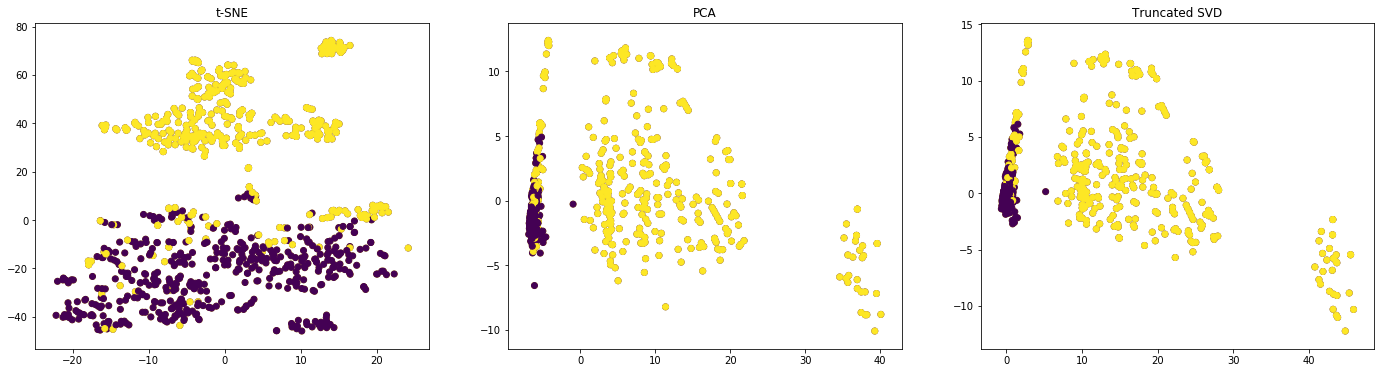

In [194]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction')


ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==0),label='No Fraud')
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==1),label='Fraud')
ax1.set_title('t-SNE')

ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),label='No Fraud')
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),label='Fraud')
ax2.set_title('PCA')

ax3.scatter(X_reduced_truncated[:,0],X_reduced_truncated[:,1],c=(Y==0),label='No Fraud')
ax3.scatter(X_reduced_truncated[:,0],X_reduced_truncated[:,1],c=(Y==1),label='Fraud')
ax3.set_title('Truncated SVD')

plt.show()

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [196]:
X=new_data.drop('Class',axis=1)
Y=new_data['Class']

In [197]:
from sklearn.model_selection import train_test_split,cross_val_score

In [198]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [199]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

In [200]:
classifiers={
    'LogisticRegression':LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'SupportVectorMachines': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
            }

In [201]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,Y_train)
    training_score=cross_val_score(classifier,X_train,Y_train,cv=5)
    print('Classifier: ',classifier.__class__.__name__,'accuracy: ',training_score.mean()*100,'% accuracy score')
    

Classifier:  LogisticRegression accuracy:  94.42034943473793 % accuracy score
Classifier:  KNeighborsClassifier accuracy:  93.13052415210687 % accuracy score
Classifier:  SVC accuracy:  93.5590955806783 % accuracy score
Classifier:  DecisionTreeClassifier accuracy:  87.83453237410072 % accuracy score


Summary:

Logistic Regression classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression)

GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

Learning Curves:
The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).

If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)

Logistic Regression Classifier shows the best score in both training and cross-validating sets.

In [202]:
from imblearn.under_sampling import NearMiss


In [203]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
undersample_X = data.drop('Class', axis=1)
undersample_y = data['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
#print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), lr) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))
    

Train: [     0      1      2 ... 284802 284803 284805] Test: [     6     12     27 ... 284797 284804 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     8     11     15 ... 284785 284791 284800]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1     24     38 ... 284798 284799 284803]
Train: [     1      3      6 ... 284803 284804 284806] Test: [     0      2      4 ... 284795 284801 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      9     10 ... 284794 284796 284802]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [204]:
nearmiss_X,nearmiss_y=NearMiss().fit_sample(undersample_X.values,undersample_y.values)

In [205]:
nearmiss_Xtrain,nearmiss_Xtest,nearmiss_ytrain,nearmiss_ytest=train_test_split(nearmiss_X,nearmiss_y,test_size=0.25,random_state=42)
lr.fit(nearmiss_X,nearmiss_y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
pred=lr.predict(nearmiss_Xtest)

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(nearmiss_ytest,pred)

0.967479674796748

In [208]:
from imblearn.over_sampling import SMOTE

In [209]:
smote_X,smote_y=SMOTE().fit_sample(undersample_X.values,undersample_y.values)

In [213]:
smote_Xtrain,smote_Xtest,smote_ytrain,smote_ytest=train_test_split(smote_X,smote_y,test_size=0.25,random_state=42)

In [214]:
smote_Xtrain.shape,smote_ytrain.shape

((426472, 30), (426472,))

In [215]:
lr.fit(smote_Xtrain,smote_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
pred=lr.predict(smote_Xtest)

In [222]:
from sklearn.metrics import classification_report

In [232]:
report=classification_report(smote_ytest,pred)

In [233]:
report

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95     71001\n           1       0.98      0.92      0.95     71157\n\n    accuracy                           0.95    142158\n   macro avg       0.95      0.95      0.95    142158\nweighted avg       0.95      0.95      0.95    142158\n'

In [235]:
accuracy_score(smote_ytest,pred)*100

94.94295080122117